# Recurrent Neural Network

## Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

### Importing the training set

In [2]:
df = pd.read_csv('CPIAUCSL.csv')
# split data into training and testing sets
dataset_train, dataset_test = train_test_split(df, test_size=0.2, shuffle=False)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
""" 
def remove_outliers_zscore(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]
    return data[(np.abs(z_scores) < threshold)]

# apply the function to the column of data containing outliers
dataset_test2 = remove_outliers_zscore(dataset_test['CPIAUCSL'])

plt.plot(dataset_test2)"""

" \ndef remove_outliers_zscore(data):\n    threshold = 3\n    mean = np.mean(data)\n    std = np.std(data)\n    z_scores = [(x - mean) / std for x in data]\n    return data[(np.abs(z_scores) < threshold)]\n\n# apply the function to the column of data containing outliers\ndataset_test2 = remove_outliers_zscore(dataset_test['CPIAUCSL'])\n\nplt.plot(dataset_test2)"

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with certain timesteps and 1 output

In [5]:
timestep = 36
X_train = []
y_train = []

for i in range(timestep, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timestep:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)



### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint
import os

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50))

### Adding the output layer

In [13]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [31]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [52]:
regressor.fit(X_train, y_train, epochs=300, batch_size=32)

Epoch 1/300
22/22 [==============================] - 1s 50ms/step - loss: 2.6967e-05
Epoch 2/300
22/22 [==============================] - 1s 48ms/step - loss: 3.0420e-05
Epoch 3/300
22/22 [==============================] - 1s 45ms/step - loss: 1.7822e-05
Epoch 4/300
22/22 [==============================] - 1s 45ms/step - loss: 1.1593e-05
Epoch 5/300
22/22 [==============================] - 1s 31ms/step - loss: 1.4398e-05
Epoch 6/300
22/22 [==============================] - 1s 32ms/step - loss: 1.0750e-05
Epoch 7/300
22/22 [==============================] - 1s 31ms/step - loss: 1.0424e-05
Epoch 8/300
22/22 [==============================] - 1s 37ms/step - loss: 1.0069e-05
Epoch 9/300
22/22 [==============================] - 1s 35ms/step - loss: 1.4994e-05
Epoch 10/300
22/22 [==============================] - 1s 29ms/step - loss: 3.8409e-05
Epoch 11/300
22/22 [==============================] - 1s 31ms/step - loss: 7.5165e-05
Epoch 12/300
22/22 [==============================] - 1s 33ms/s

## Part 3 - Making the predictions and visualising the results

### Getting the real CPIAUCSL 

In [43]:
real_CPIAUCSL_data = dataset_test.iloc[:, 1:2].values

### Getting the predicted CPIAUCSL

In [53]:
dataset_total = pd.concat((dataset_train['CPIAUCSL'], dataset_test['CPIAUCSL']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timestep:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(timestep, len(dataset_test)+timestep):
    X_test.append(inputs[i-timestep:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

### Visualising the results

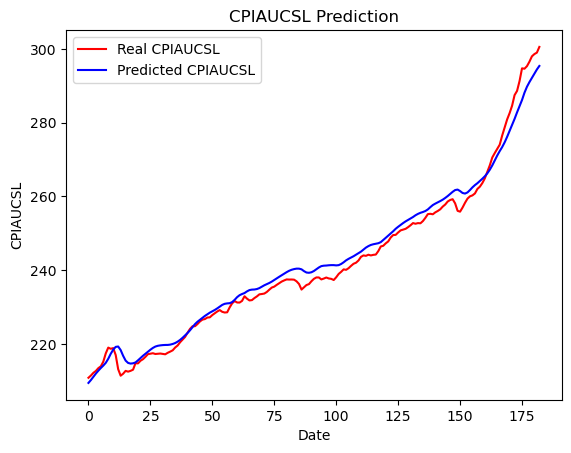

In [54]:
plt.plot(real_CPIAUCSL_data, color = 'red', label = 'Real CPIAUCSL')
plt.plot(predicted, color = 'blue', label = 'Predicted CPIAUCSL')
plt.title('CPIAUCSL Prediction')
plt.xlabel('Date')
plt.ylabel('CPIAUCSL')
plt.legend()
plt.show()

In [56]:
# save predicted values
predicted_df = pd.DataFrame(predicted)

In [57]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_CPIAUCSL_data, predicted))
print('RMSE: ', rmse)


RMSE:  2.7518011765132813


In [46]:
regressor.save('CPIAUCSL_Model_best_v2.h5')